In [50]:
from scipy.optimize import curve_fit
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame, HTML
import scipy.constants as const
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
#from negotovost import Negotovost

In [51]:
def extract_float(in_str):
    arr = in_str.replace("'",'').split('°')
    return int(arr[0]) + float(arr[1])/60

In [52]:
#koti = [169+25/60,173+35/60,174+15/60,174+20/60,171+45/60,175+50/60]
koti = ["169°25'","173°35'","174°15'","174°20'","171°45'","175°50'"]
koti = [extract_float(x) for x in koti]
lambde = [436,546,577,579,486,656]

In [53]:
koti,lambde

([169.41666666666666,
  173.58333333333334,
  174.25,
  174.33333333333334,
  171.75,
  175.83333333333334],
 [436, 546, 577, 579, 486, 656])

In [54]:
def fit_func(x,a,b,c):
    return a + b*x + c * x**(1/2)

In [55]:
#x = [-1.95,5.02,-5.02,10.05,-10.05]
x = lambde
y = koti

print(len(y))

params = curve_fit(fit_func, x, y)
a,b,c = params[0]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
#print(a)
print(params[0],'+-',errs)

6
[68.90795546 -0.13615082  7.65987464] +- [11.12435165  0.02075075  0.96245047]


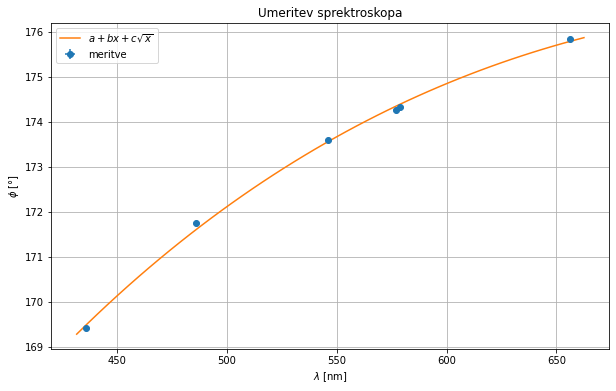

In [56]:
x_theoretical = np.linspace(min(x)*0.99,max(x)*1.01)
y_theoretical = fit_func(x_theoretical,a,b,c)

plt.errorbar(x, y, yerr=0,xerr=np.ones(len(x))*0.05,fmt='o',label='meritve')
plt.plot(x_theoretical, y_theoretical,label='$a+bx+c\sqrt{x}$')

plt.title(r'')
plt.ylabel(r'$\phi$ [°]')
plt.xlabel(r'$\lambda$ [nm]')

plt.title('Umeritev sprektroskopa')

plt.grid()
plt.legend()
#plt.savefig('./umeritev.png',dpi=250)
plt.show()

In [58]:
def fit_inverse(phi,a,b,c):
    return ((-c+np.sqrt(c**2 - 4*b*(a-phi)))/(2*b))**2

In [91]:
zarnica = pd.read_csv('varcna_zarnica.txt')
fit_func = np.vectorize(fit_func)
koti_zarnica = [extract_float(x) for x in zarnica['φ[°]']]
zarnica['valovne'] = fit_inverse(koti_zarnica,a,b,c)

header = ['Barva','$\phi$ [°]','$\lambda$ [nm]']

print(r'\noindent',zarnica.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{llr}
\toprule
      Barva & $\phi$ [°] & $\lambda$ [nm] \\
\midrule
  Vijolična &    169°25' &            434 \\
Modrozelena &    171°35' &            485 \\
     Zelena &    173°40' &            550 \\
     Rumena &    174°20' &            576 \\
     Rumena &    174°25' &            580 \\
      Rdeča &    175°20' &            626 \\
\bottomrule
\end{tabular}



In [79]:
led_dioda = pd.read_csv('led_dioda.txt')
koti1_zarnica = [extract_float(x) for x in led_dioda['φ1[ °]']]
koti2_zarnica = [extract_float(x) for x in led_dioda['φ2[ °]']]
koti_max_zarnica = [extract_float(x) for x in led_dioda['φmax[ °]']]

led_dioda['centralna'] = fit_inverse(koti_max_zarnica,a,b,c)
led_dioda['kot1'] = fit_inverse(koti1_zarnica,a,b,c)
led_dioda['kot2'] = fit_inverse(koti2_zarnica,a,b,c)

header = ['Barva','$\phi_1$ [°]','$\phi_2$ [°]','$\phi_{\\textrm{max}}$ [°]','$\lambda_{\\textrm{max}}$ [nm]','$\lambda_1$ [nm]','$\lambda_2$ [nm]']

print(r'\noindent',led_dioda.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{llllrrr}
\toprule
 Barva & $\phi_1$ [°] & $\phi_2$ [°] & $\phi_{\textrm{max}}$ [°] & $\lambda_{\textrm{max}}$ [nm] & $\lambda_1$ [nm] & $\lambda_2$ [nm] \\
\midrule
 Modra &      168°05' &     175°'05' &                  171°'05' &                           473 &              408 &              612 \\
Rumena &      173°05' &     175°'35' &                  174°'05' &                           566 &              530 &              642 \\
\bottomrule
\end{tabular}



In [83]:
volframska = pd.read_csv('volframska.txt')
koti1_volframska = [extract_float(x) for x in volframska['φ1[°]']]
koti2_volframska = [extract_float(x) for x in volframska['φ2[ °]']]

volframska['kot1'] = fit_inverse(koti1_volframska,a,b,c)
volframska['kot2'] = fit_inverse(koti2_volframska,a,b,c)

header = ['Barva','$\phi_1$ [°]','$\phi_2$ [°]','$\lambda_1$ [nm]','$\lambda_2$ [nm]']

print(r'\noindent',volframska.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{lllrr}
\toprule
    Barva & $\phi_1$ [°] & $\phi_2$ [°] & $\lambda_1$ [nm] & $\lambda_2$ [nm] \\
\midrule
Vijolična &      167°30' &      170°20' &              397 &              455 \\
    Modra &      170°20' &      171°40' &              455 &              488 \\
   Zelena &      171°40' &      173°20' &              488 &              538 \\
   Rumena &      173°20' &      174°30' &              538 &              584 \\
  Oranžna &      174°30' &      175°25' &              584 &              631 \\
    Rdeča &      175°25' &      176°10' &              631 &              689 \\
\bottomrule
\end{tabular}



In [88]:
no2 = pd.read_csv('NO2.txt')
koti1_volframska = [extract_float(x) for x in no2['φ[°]']]

no2['kot1'] = fit_inverse(koti1_volframska,a,b,c)
no2['barve'] = ['Zelena','Zelena','Zelena','Modra','Modra','Modra','Modra']

header = ['$\phi_1$ [°]','$\lambda_1$ [nm]','Barva']

print(r'\noindent',no2.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{lrl}
\toprule
$\phi_1$ [°] & $\lambda_1$ [nm] &  Barva \\
\midrule
     172°20' &              506 & Zelena \\
     172°10' &              502 & Zelena \\
     171°45' &              490 & Zelena \\
     171°25' &              481 &  Modra \\
     171°10' &              475 &  Modra \\
     170°45' &              464 &  Modra \\
     170°40' &              462 &  Modra \\
\bottomrule
\end{tabular}



In [97]:
he = pd.read_csv('he.txt')
koti_he = [extract_float(x) for x in he['φ[ °]']]
he['valovne'] = fit_inverse(koti_he,a,b,c)

header = ['Barva','$\phi$ [°]','Tablična $\lambda$ [nm]','$\lambda$ [nm]']

print(r'\noindent',he.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{llrr}
\toprule
    Barva & $\phi$ [°] & Tablična $\lambda$ [nm] & $\lambda$ [nm] \\
\midrule
   Rumena &    174°30' &                     588 &            584 \\
    Rdeča &    175°55' &                     668 &            667 \\
   Zelena &    172°10' &                     502 &            502 \\
   Zelena &    171°50' &                     492 &            492 \\
    Modra &      171°0 &                     471 &            471 \\
Vijolična &    169°55' &                     447 &            445 \\
\bottomrule
\end{tabular}



In [98]:
ne = pd.read_csv('ne.txt')
koti_ne = [extract_float(x) for x in ne['φ[ °]']]
ne['valovne'] = fit_inverse(koti_ne,a,b,c)

header = ['Barva','$\phi$ [°]','Tablična $\lambda$ [nm]','$\lambda$ [nm]']

print(r'\noindent',ne.to_latex( float_format="%.0f",index=False,header=header,escape=False,decimal=',' ))

\noindent \begin{tabular}{llrr}
\toprule
  Barva & $\phi$ [°] & Tablična $\lambda$ [nm] & $\lambda$ [nm] \\
\midrule
  Rdeča &    175°10' &                     618 &            617 \\
  Rdeča &    175°30' &                     640 &            637 \\
Oranžna &    174°50' &                     594 &            599 \\
 Rumena &    174°30' &                     585 &            584 \\
 Zelena &    173°20' &                     540 &            538 \\
\bottomrule
\end{tabular}

